In [1]:
#importing neccessary library

In [90]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\satyam\Desktop\project\wine red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape  #checking row and columns

(1599, 12)

In [5]:
data.isna().sum()  #checking null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#from above we observation that there is null values in data set

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# we find all are intiger or float data 

In [9]:
data['quality'].unique()  #check unique value

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
for i in data.columns:
    print(data[i].value_counts())  # cheking all counts 
    print('\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
# cheking stats of dataset
# in the above observation we find some skewness in some column
# no null values present in data set
# there is huge difference between max and 75% thats mean there is outler present in dataset
# here is std is high in residual sugar ,chloride,citric acid,free sulfurdioxide,total sulfurdioxide,alcohol,sulphate.
# citric acid has zeros value we have to fix it

In [13]:
data['citric acid']=data['citric acid'].replace(0,data['citric acid'].mean())  # fix zeroes in citric acid column

# Analysis (EDA)

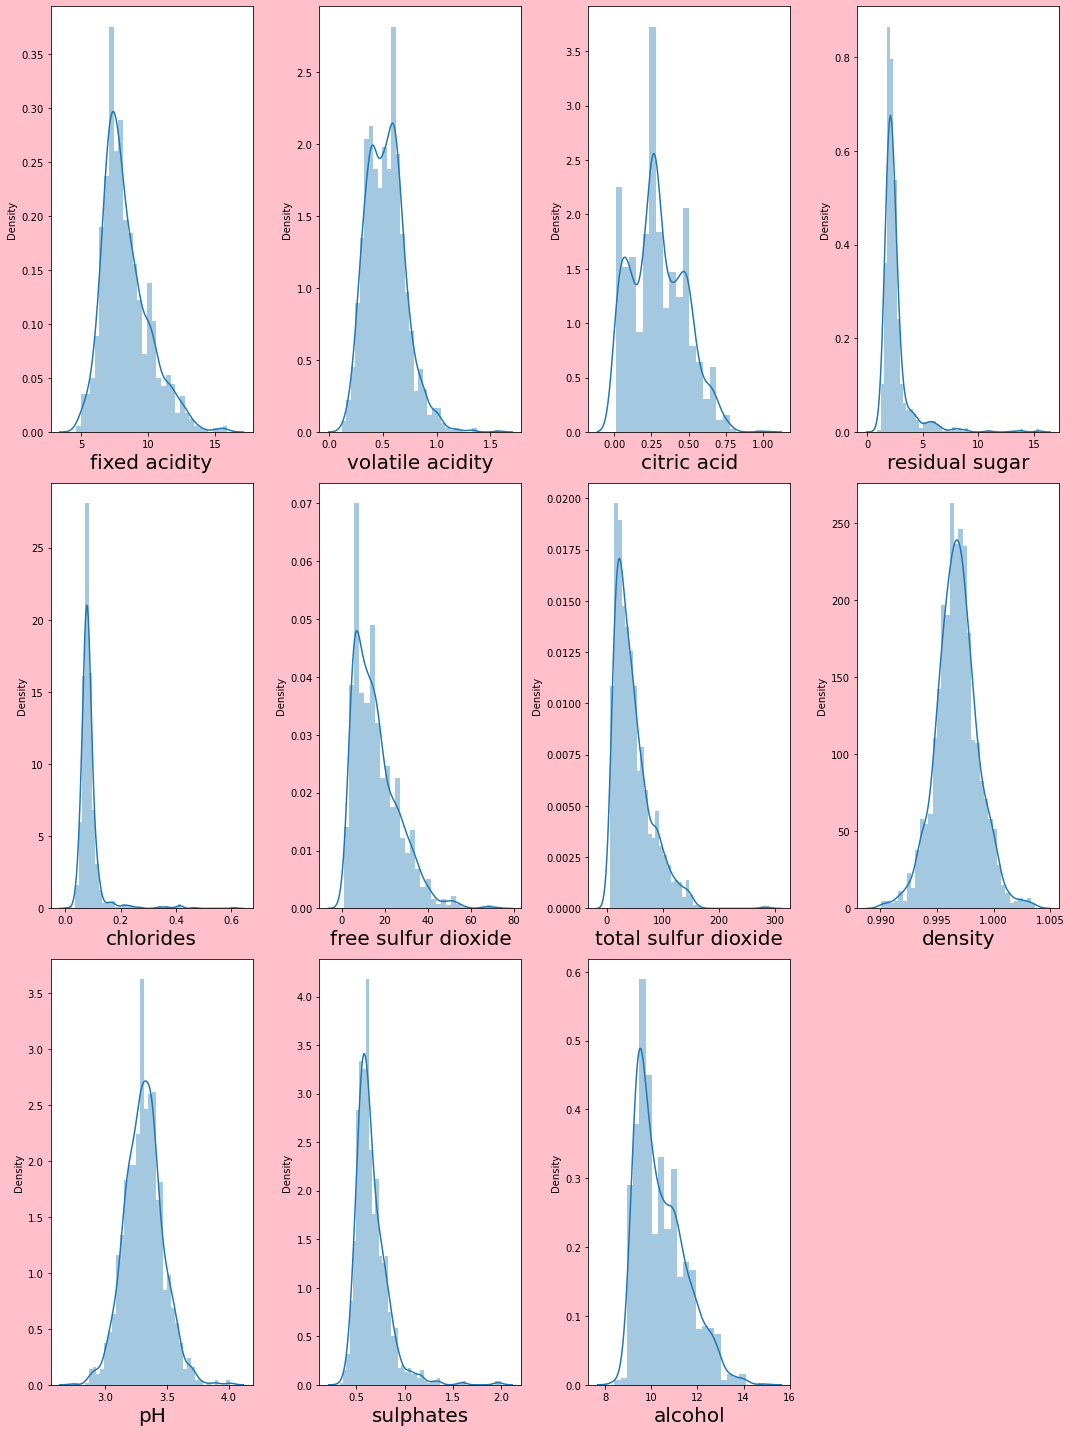

In [14]:
#cheking ditribution of plot
plt.figure(figsize=(15,20),facecolor='pink')
plotnumber=1
for column in data:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

In [15]:
# in above graph citric acid,volatile acidity are not normal ditribition
# And remaining all column have some skewness except density

In [16]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.338008
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [17]:
#Removing skewness
#data=np.cbrt(data)   

In [18]:
df_feature=data.drop('quality',axis=1)

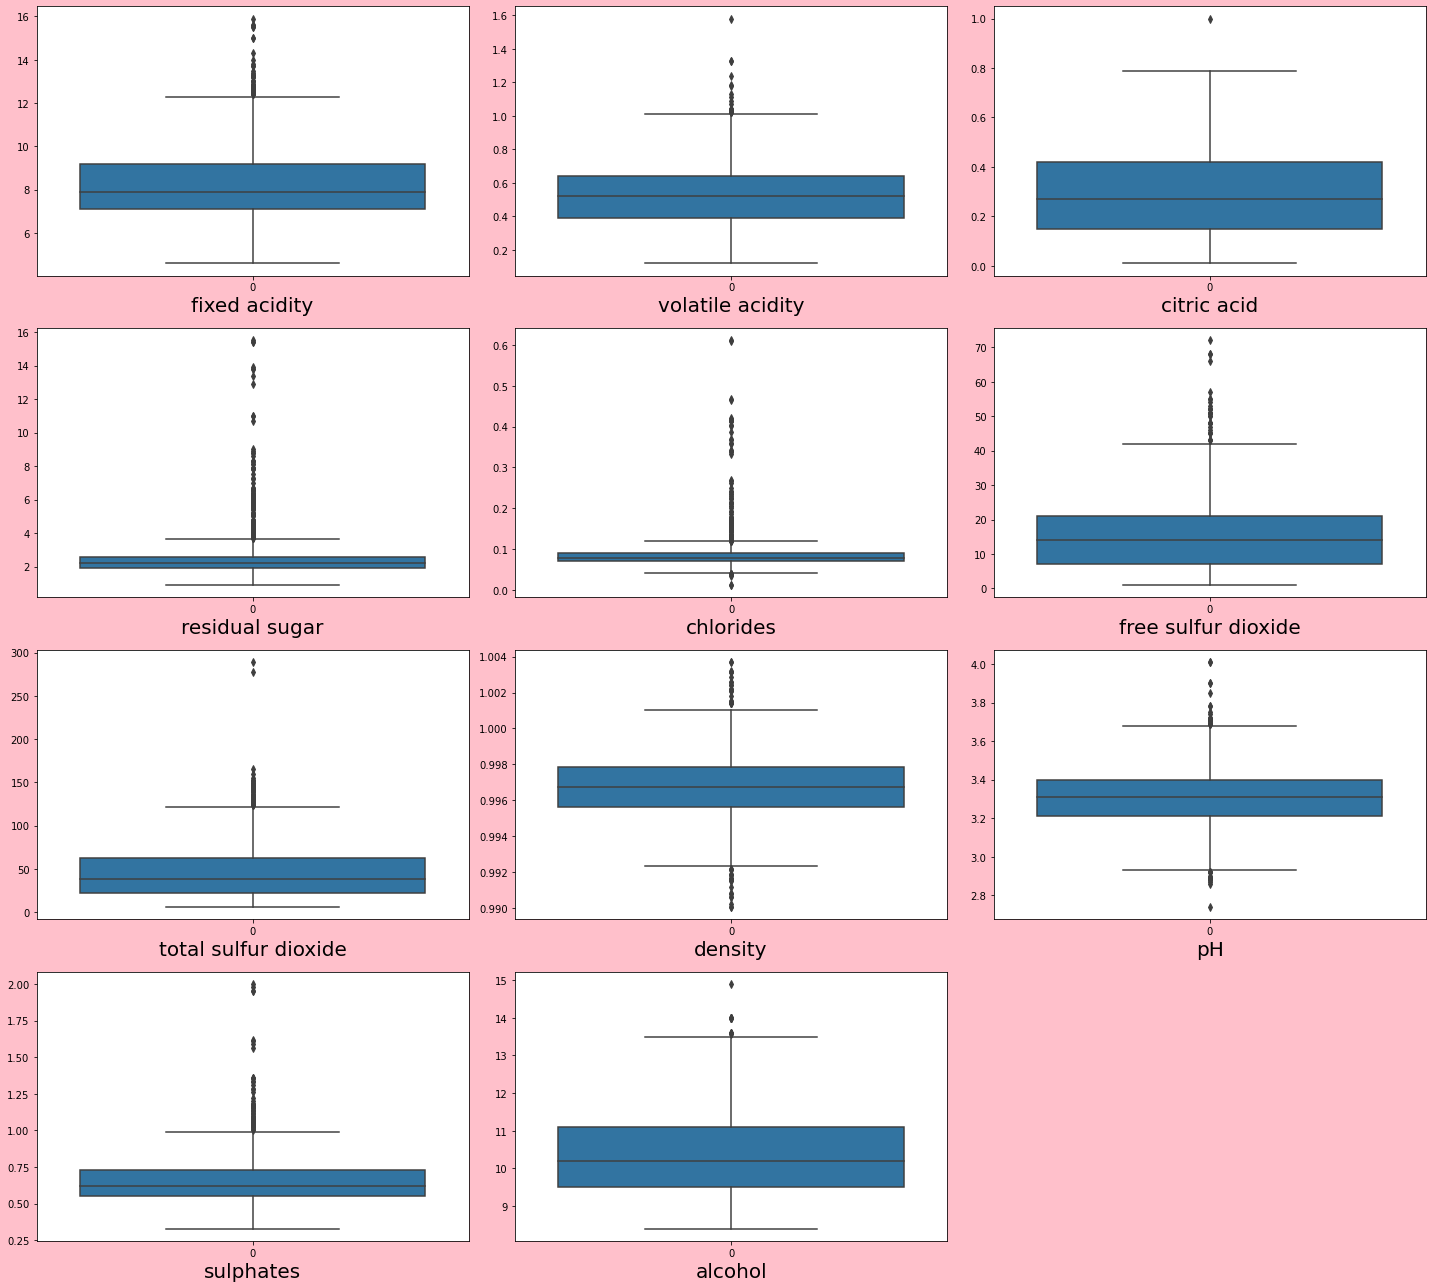

In [19]:
#cheking outliers in dataset
plt.figure(figsize=(20,18),facecolor='pink')
plotnumber=1
for column in data:
    if plotnumber<=11: #not taking outcome bcz it is 100%  real or true data
        plt.subplot(4,3,plotnumber)
        ax=sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()    

In [20]:
# from the above graph outliers is present in all feature except citric acid

# finding IQR to identify outliers

In [21]:
# 1st quantile
q1=data.quantile(0.25)

# 3rd quantile
q3=data.quantile(0.75)
iqr=q3-q1

In [22]:
iqr

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.270000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64

In [23]:
data.shape

(1599, 12)

# Removing outliers

In [24]:
fixed_acidity_high=(q3['fixed acidity'] +(1.5*iqr['fixed acidity']))  #checking  validating or outlier 
print(fixed_acidity_high)
a=np.where(data['fixed acidity']>fixed_acidity_high)      # cheking index of outliers
data=data.drop(data.index[a])                         # drop the index which where found outliers
print(data.shape)

data.reset_index()

12.349999999999998
(1550, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1546,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1547,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1548,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
volatile_acidity_high=(q3['volatile acidity'] +(1.5*iqr['volatile acidity']))
print(volatile_acidity_high)
a=np.where(data['volatile acidity']>volatile_acidity_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

1.0150000000000001
(1531, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1527,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1528,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1529,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
# its has both low and high outliers
volatile_acidity_low=(q1['volatile acidity'] +(1.5*iqr['volatile acidity']))
print(volatile_acidity_low)
a=np.where(data['volatile acidity']>volatile_acidity_low)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

0.765
(1412, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
2,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
3,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,5,7.4,0.660,0.270976,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1408,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1409,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1410,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
residual_sugar_high=(q3['residual sugar'] +(1.5*iqr['residual sugar']))
print(residual_sugar_high)
a=np.where(data['residual sugar']>residual_sugar_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

3.6500000000000004
(1289, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
2,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
3,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,5,7.4,0.660,0.270976,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1285,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1286,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1287,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [28]:
# for low ouliers
residual_sugar_low=(q1['residual sugar'] +(1.5*iqr['residual sugar']))
print(residual_sugar_low)
a=np.where(data['residual sugar']>residual_sugar_low)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

2.95
(1217, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
2,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
3,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,5,7.4,0.660,0.270976,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,1593,6.8,0.620,0.080000,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1213,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1214,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1215,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [29]:
chlorides_high=(q3['chlorides'] +(1.5*iqr['chlorides'])) #checking  validating or outlier 
print(chlorides_high)
a=np.where(data['chlorides']>chlorides_high)       # cheking index of outliers
data=data.drop(data.index[a])   # drop the index which where found outliers
print(data.shape)

data.reset_index()

0.11999999999999998
(1150, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
2,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
3,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,5,7.4,0.660,0.270976,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1593,6.8,0.620,0.080000,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1146,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1147,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1148,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [30]:
chlorides_low=(q1['chlorides'] +(1.5*iqr['chlorides'])) #checking  validating or outlier 
print(chlorides_low)
a=np.where(data['chlorides']>chlorides_low)       # cheking index of outliers
data=data.drop(data.index[a])   # drop the index which where found outliers
print(data.shape)

data.reset_index()

0.09999999999999999
(1067, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
2,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
3,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,5,7.4,0.660,0.270976,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,1593,6.8,0.620,0.080000,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1063,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1064,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1065,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [31]:
free_sulfur_dioxide_high=(q3['free sulfur dioxide'] +(1.5*iqr['free sulfur dioxide']))
print(free_sulfur_dioxide_high)
a=np.where(data['free sulfur dioxide']>free_sulfur_dioxide_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

42.0
(1055, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
2,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
3,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,5,7.4,0.660,0.270976,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,1593,6.8,0.620,0.080000,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1051,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1052,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1053,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [32]:
total_sulfur_dioxide_high=(q3['total sulfur dioxide'] +(1.5*iqr['total sulfur dioxide']))
print(total_sulfur_dioxide_high)
a=np.where(data['total sulfur dioxide']>total_sulfur_dioxide_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

122.0
(1030, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
2,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
3,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,5,7.4,0.660,0.270976,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1593,6.8,0.620,0.080000,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1026,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1027,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1028,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [33]:
density_high=(q3['density'] +(1.5*iqr['density']))
print(density_high)
a=np.where(data['density']>density_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

1.0011875
(1030, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
2,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
3,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,5,7.4,0.660,0.270976,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1593,6.8,0.620,0.080000,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1026,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1027,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1028,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [34]:
density_low=(q1['density'] +(1.5*iqr['density']))
print(density_low)
a=np.where(data['density']>density_low)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

0.9989525
(971, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
2,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
3,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,5,7.4,0.660,0.270976,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,1593,6.8,0.620,0.080000,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
967,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
968,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
969,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [35]:
pH_high=(q3['pH'] +(1.5*iqr['pH']))
print(pH_high)
a=np.where(data['pH']>pH_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

3.6849999999999996
(954, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
2,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
3,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,5,7.4,0.660,0.270976,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,1593,6.8,0.620,0.080000,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
950,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
951,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
952,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [36]:
pH_low=(q1['pH'] +(1.5*iqr['pH']))
print(pH_low)
a=np.where(data['pH']>pH_low)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

3.495
(849, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
1,3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
2,6,7.9,0.60,0.060000,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
3,7,7.3,0.65,0.270976,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
4,8,7.8,0.58,0.020000,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,1590,6.3,0.55,0.150000,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
845,1592,6.3,0.51,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
846,1593,6.8,0.62,0.080000,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
847,1594,6.2,0.60,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [37]:
sulphates_high=(q3['sulphates'] +(1.5*iqr['sulphates']))
print(sulphates_high)
a=np.where(data['sulphates']>sulphates_high)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

0.9999999999999999
(832, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
1,3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
2,6,7.9,0.60,0.060000,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
3,7,7.3,0.65,0.270976,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
4,8,7.8,0.58,0.020000,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,1590,6.3,0.55,0.150000,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
828,1592,6.3,0.51,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
829,1593,6.8,0.62,0.080000,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
830,1594,6.2,0.60,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [38]:
sulphates_low=(q1['sulphates'] +(1.5*iqr['sulphates']))
print(sulphates_low)
a=np.where(data['sulphates']>sulphates_low)
data=data.drop(data.index[a])
print(data.shape)

data.reset_index()

0.82
(768, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
1,3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
2,6,7.9,0.60,0.060000,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
3,7,7.3,0.65,0.270976,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
4,8,7.8,0.58,0.020000,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1590,6.3,0.55,0.150000,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
764,1592,6.3,0.51,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
765,1593,6.8,0.62,0.080000,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
766,1594,6.2,0.60,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [39]:
alcohol_high=(q3['alcohol'] +(1.5*iqr['alcohol'])) #checking  validating or outlier 
print(alcohol_high)
a=np.where(data['alcohol']>alcohol_high)             # cheking index of outliers
data=data.drop(data.index[a])                       # drop the index which where found outliers
print(data.shape)

data.reset_index()

13.5
(767, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
1,3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
2,6,7.9,0.60,0.060000,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
3,7,7.3,0.65,0.270976,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
4,8,7.8,0.58,0.020000,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1590,6.3,0.55,0.150000,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
763,1592,6.3,0.51,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
764,1593,6.8,0.62,0.080000,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
765,1594,6.2,0.60,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [40]:
# all the outliers removed

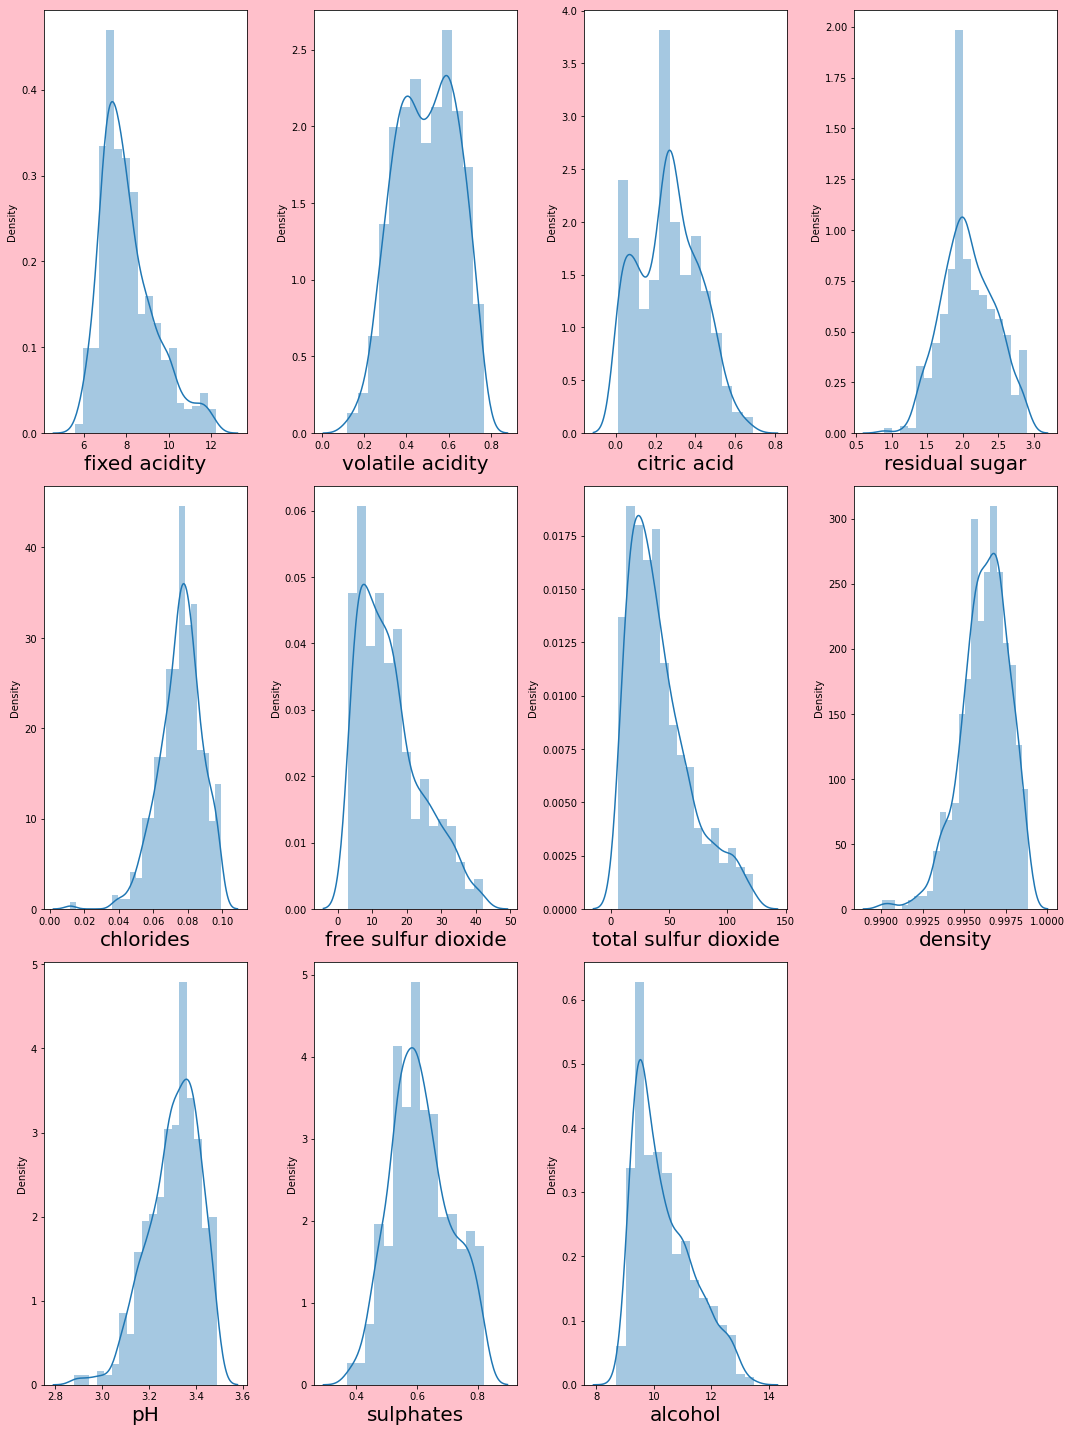

In [41]:
# again skewness is gone or not cheking ditribution of plot
plt.figure(figsize=(15,20),facecolor='pink')
plotnumber=1
for column in data:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

In [42]:
# almost all skewness gone

# VISULIZATION

In [43]:
#seprating features and label
x=data.drop(columns=['quality'])
y=data['quality']

# To find the relation between feature we use heat map

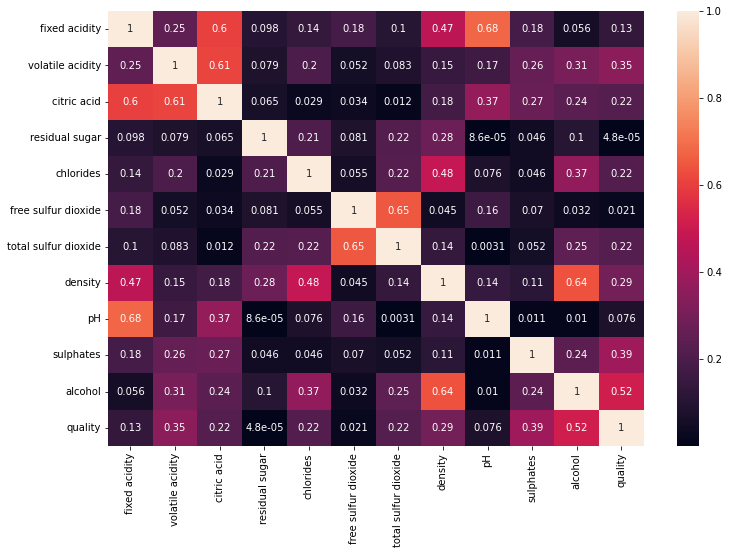

In [44]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(12,8))
sns.heatmap(relation,annot=True)
plt.show()

In [45]:
# from above plot there is no any multicolinearity issue.
# there no much -ve relation between target and feature.
# alchol is more related to label.
# ph,free sulfur dioxide ,residual sugar, are very less related to label.
# density,ph,citic acid,volatile acidity , are related to each other.
# ph and fixed acidic are related to each other

In [46]:
# feature selection tecnique
relation['quality'].sort_values(ascending=False) # cheking corelation

quality                 1.000000
alcohol                 0.515072
sulphates               0.394579
volatile acidity        0.354665
density                 0.293914
total sulfur dioxide    0.222402
citric acid             0.221705
chlorides               0.215815
fixed acidity           0.133038
pH                      0.075993
free sulfur dioxide     0.021439
residual sugar          0.000048
Name: quality, dtype: float64

In [47]:
# from above we find ph is corelated to label
# ph,free sulfur dioxide ,residual sugar, are very less related to label but we did not remove all this column bcz here are
# column is less 

In [48]:
#for scalling features to remove baisness 
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# EDA  PROCESSING IS COMPLETED

In [49]:
# trainning and spliting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

# START MODEL BULIDING 

In [62]:
#write one funtion and call as many as time to check accuracy score of different model
def metric_score(dt,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=dt.predict(x_train)
        
        print('\n========== Train Result========')
        print(f'Accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train==False:
    
        pred=dt.predict(x_test)
        
        print('\n========== Test Result========')
        print(f'Accuracy score: {accuracy_score(y_test,pred)*100:.2f}%')

        print('\n\n Test classification Report\n',classification_report(y_test,pred,digits=2))

In [63]:
#model buliding
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
#calling function
metric_score(dt,x_train,x_test,y_train,y_test, train=True)
metric_score(dt,x_train,x_test,y_train,y_test, train=False)


========== Train Result========
Accuracy score: 100.00%

========== Test Result========
Accuracy score: 59.38%


 Test classification Report
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.57      0.64        76
           6       0.60      0.69      0.64        85
           7       0.44      0.55      0.49        22
           8       0.00      0.00      0.00         3

    accuracy                           0.59       192
   macro avg       0.36      0.36      0.35       192
weighted avg       0.61      0.59      0.59       192



In [ ]:
# from above there is very big difference between train or test result that is=42%

# confusion_matix for multi class

In [65]:
y_pred=dt.predict(x_test)

#for confusiom mat
confusion_matrix(y_test,y_pred)

array([[ 0,  2,  4,  0,  0],
       [ 4, 43, 26,  3,  0],
       [ 3, 11, 59, 12,  0],
       [ 0,  2,  7, 12,  1],
       [ 0,  1,  2,  0,  0]], dtype=int64)

In [66]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Q4','Q5','Q6','Q7','Q8'],index=['Q4','Q5','Q6','Q7','Q8'])
#cover into data frame

,Q4,Q5,Q6,Q7,Q8
Q4,0,2,4,0,0
Q5,4,43,26,3,0
Q6,3,11,59,12,0
Q7,0,2,7,12,1
Q8,0,1,2,0,0


In [ ]:
# above if row and column matches then it is true positive reamining false positive


# lets see DecisionTree to understand the data

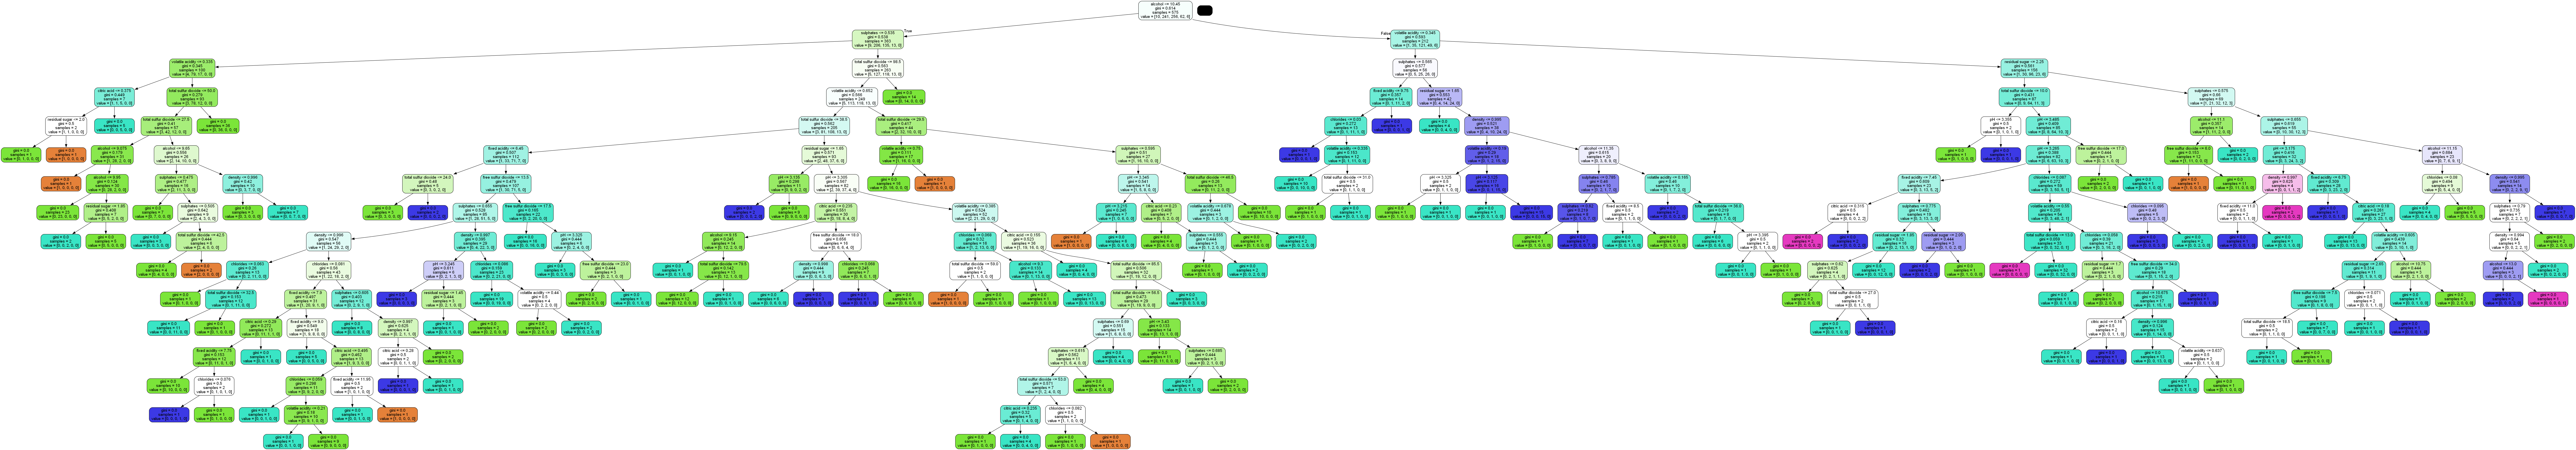

In [67]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus

dot_data=export_graphviz(clf,feature_names=feature_name,rounded=True,filled=True)

graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('dt.png')
#show
Image(graph.create_png())

# hyperparameter tunning

In [68]:
#from above observation we select some hyperparameter tunning
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,20),         # the maximum dept tree
    'min_samples_leaf':range(2,6),    # maximum no of sample for leaf node
    'min_samples_split':range(3,8),   # minimum no of sample required t0 split
    'max_leaf_nodes':range(5,10)}     # nodes are defined as relative reduction in impurity

In [69]:
#use all best  para meter for model improvement
grid_search=GridSearchCV(estimator=clf,       #using our model
                       param_grid=grid_param,   # usinf best parameter for better accuracy
                        cv=5,
                        n_jobs=-1)

In [70]:
#trainning parameter
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [75]:
# check best parameter

best_parameters=grid_search.best_params_   #it give all the best parameter for improvement or accuracy

best_parameters

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [76]:
# using parameter we again train the data with DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 15,
 max_leaf_nodes= 7,
 min_samples_leaf= 5,
 min_samples_split= 8)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=7, min_samples_leaf=5,
                       min_samples_split=8)

In [77]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


========== Train Result========
Accuracy score: 100.00%

========== Test Result========
Accuracy score: 56.25%


 Test classification Report
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.65      0.54      0.59        76
           6       0.60      0.65      0.62        85
           7       0.41      0.55      0.47        22
           8       0.00      0.00      0.00         3

    accuracy                           0.56       192
   macro avg       0.33      0.35      0.34       192
weighted avg       0.57      0.56      0.56       192



In [78]:
# from above parametter we did not increase the accuracy
# now we can modify parameter byself.

In [87]:
# using parameter we again train the data with DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 10,
 max_leaf_nodes= 7,
 min_samples_leaf= 6,
 min_samples_split= 10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=6,
                       min_samples_split=10)

In [88]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


========== Train Result========
Accuracy score: 100.00%

========== Test Result========
Accuracy score: 56.25%


 Test classification Report
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.65      0.54      0.59        76
           6       0.60      0.65      0.62        85
           7       0.41      0.55      0.47        22
           8       0.00      0.00      0.00         3

    accuracy                           0.56       192
   macro avg       0.33      0.35      0.34       192
weighted avg       0.57      0.56      0.56       192



# from above we find default parameter is best one